In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance 
import numpy as np
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from pandas.plotting import autocorrelation_plot

In [2]:
df1= pd.read_csv('Zeel_ConversionActions.csv',skiprows=2,index_col='Day',parse_dates=True)
df2= pd.read_csv('Zeel_RegularStats.csv',skiprows=2,index_col='Day',parse_dates=True)

In [3]:
df=df1.merge(df2,on=['Day','Campaign'])

In [4]:
df.columns.tolist()

['Campaign',
 'Path - Android App Install_All conv.',
 'Path - Corporate Inquiry – Contact_All conv.',
 'Path - Corporate – Booking_All conv.',
 'Path - CurrentCustomer – Booking_All conv.',
 'Path - Email Capture (No Password)_All conv.',
 'Path - Gift Card – Booking_All conv.',
 'Path - NetNewCustomer – Booking_All conv.',
 'Path - UpgradingCustomer – Booking_All conv.',
 ' Clicks ',
 ' Impressions ',
 ' Cost ',
 ' Avg. position ',
 ' Conversions ',
 'Search Impr. share']

In [5]:
df.dtypes

Campaign                                        object
Path - Android App Install_All conv.             int64
Path - Corporate Inquiry – Contact_All conv.     int64
Path - Corporate – Booking_All conv.             int64
Path - CurrentCustomer – Booking_All conv.       int64
Path - Email Capture (No Password)_All conv.     int64
Path - Gift Card – Booking_All conv.             int64
Path - NetNewCustomer – Booking_All conv.        int64
Path - UpgradingCustomer – Booking_All conv.     int64
 Clicks                                          int64
 Impressions                                     int64
 Cost                                            int64
 Avg. position                                   int64
 Conversions                                     int64
Search Impr. share                              object
dtype: object

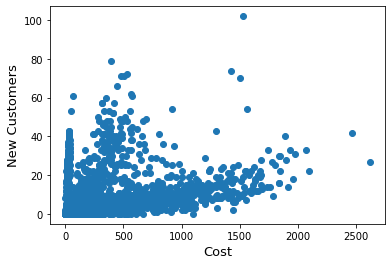

In [6]:
fig, ax = plt.subplots()
ax.scatter(df[' Cost '], df[' Conversions '])
plt.ylabel('New Customers', fontsize=13)
plt.xlabel('Cost', fontsize=13)
plt.show()

In [7]:
df['Path - NetNewCustomer – Booking_All conv.'] = pd.to_numeric(df['Path - NetNewCustomer – Booking_All conv.'],errors='coerce')
df[' Clicks '] = pd.to_numeric(df[' Clicks '],errors='coerce')
df[' Impressions '] = pd.to_numeric(df[' Impressions '],errors='coerce')
df['Search Impr. share'] = pd.to_numeric(df['Search Impr. share'],errors='coerce')
df[' Conversions '] = pd.to_numeric(df[' Conversions '],errors='coerce')
df[' Cost '] = pd.to_numeric(df[' Cost '],errors='coerce')
#df = df.drop((df[' Conversions ']==0).index)
df = df[(df[' Conversions '] > 0) & (df[' Cost '] > 100)]

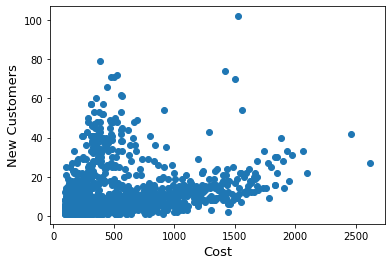

In [8]:
fig, ax = plt.subplots()
ax.scatter(df[' Cost '], df[' Conversions '])
plt.ylabel('New Customers', fontsize=13)
plt.xlabel('Cost', fontsize=13)
plt.show()

In [9]:
df = df[~df["Campaign"].str.contains("Brand", na=False)]
df = df[~df["Campaign"].str.contains("YouTube", na=False)]
df = df[~df["Campaign"].str.contains("GDN", na=False)]
df = df[~df["Campaign"].str.contains("Croud", na=False)]
df = df[~df["Campaign"].str.contains("Display", na=False)]

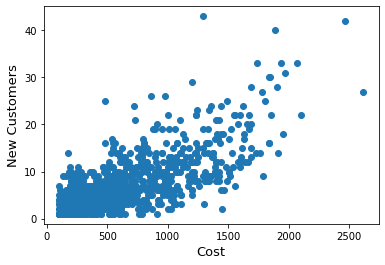

In [10]:
fig, ax = plt.subplots()
ax.scatter(df[' Cost '], df[' Conversions '])
plt.ylabel('New Customers', fontsize=13)
plt.xlabel('Cost', fontsize=13)
plt.show()

In [11]:
df['CPA']=df[' Cost ']/df[' Conversions ']
df['CTR']=df[' Clicks ']/df[' Impressions ']
df['CPC']=df[' Cost ']/df[' Clicks ']

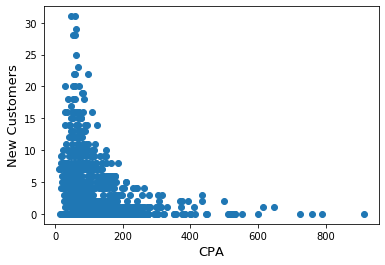

In [12]:
fig, ax = plt.subplots()
ax.scatter(df['CPA'], df['Path - NetNewCustomer – Booking_All conv.'])
plt.ylabel('New Customers', fontsize=13)
plt.xlabel('CPA', fontsize=13)
plt.show()

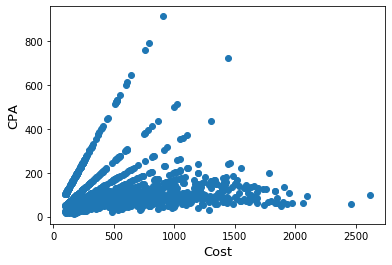

In [13]:
fig, ax = plt.subplots()
ax.scatter(df[' Cost '], df['CPA'])
plt.ylabel('CPA', fontsize=13)
plt.xlabel('Cost', fontsize=13)
plt.show()

In [14]:
df = df[(df['CPA'] < 250)]

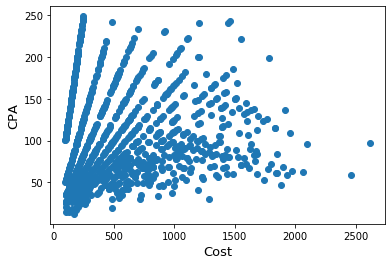

In [15]:
fig, ax = plt.subplots()
ax.scatter(df[' Cost '], df['CPA'])
plt.ylabel('CPA', fontsize=13)
plt.xlabel('Cost', fontsize=13)
plt.show()

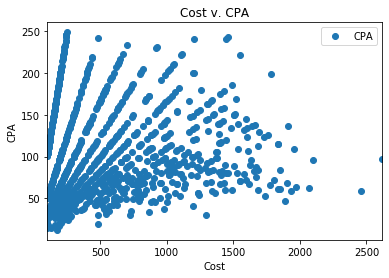

In [16]:
df.plot(x=' Cost ', y='CPA', style='o')  
plt.title('Cost v. CPA')  
plt.xlabel('Cost')  
plt.ylabel('CPA')  
plt.show()

In [17]:
df.describe()

,Path - Android App Install_All conv.,Path - Corporate Inquiry – Contact_All conv.,Path - Corporate – Booking_All conv.,Path - CurrentCustomer – Booking_All conv.,Path - Email Capture (No Password)_All conv.,Path - Gift Card – Booking_All conv.,Path - NetNewCustomer – Booking_All conv.,Path - UpgradingCustomer – Booking_All conv.,Clicks,Impressions,Cost,Avg. position,Conversions,Search Impr. share,CPA,CTR,CPC
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,0.0,1215.000000,1215.000000,1215.000000
mean,0.171193,0.431276,0.110288,0.873251,11.579424,0.099588,2.777778,0.138272,194.866667,4633.640329,550.035391,1.992593,6.175309,NaN,118.741653,0.055596,3.825191
std,0.452334,1.208840,0.580590,1.927534,16.546477,0.398669,4.418584,0.573129,149.690423,4701.787609,428.615882,0.494561,5.604016,NaN,92.120094,0.034898,2.753441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,93.000000,101.000000,1.000000,1.000000,NaN,12.214286,0.011924,0.911894
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,1727.000000,214.000000,2.000000,2.000000,NaN,61.550000,0.029525,1.831783
50%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,171.000000,2919.000000,415.000000,2.000000,5.000000,NaN,96.000000,0.041210,2.855596
75%,0.000000,0.000000,0.000000,1.000000,19.000000,0.000000,4.000000,0.000000,270.000000,4716.500000,776.500000,2.000000,8.000000,NaN,147.350000,0.069813,4.995454
max,4.000000,10.000000,9.000000,16.000000,89.000000,6.000000,31.000000,11.000000,831.000000,23411.000000,2617.000000,4.000000,43.000000,NaN,912.000000,0.245902,25.000000


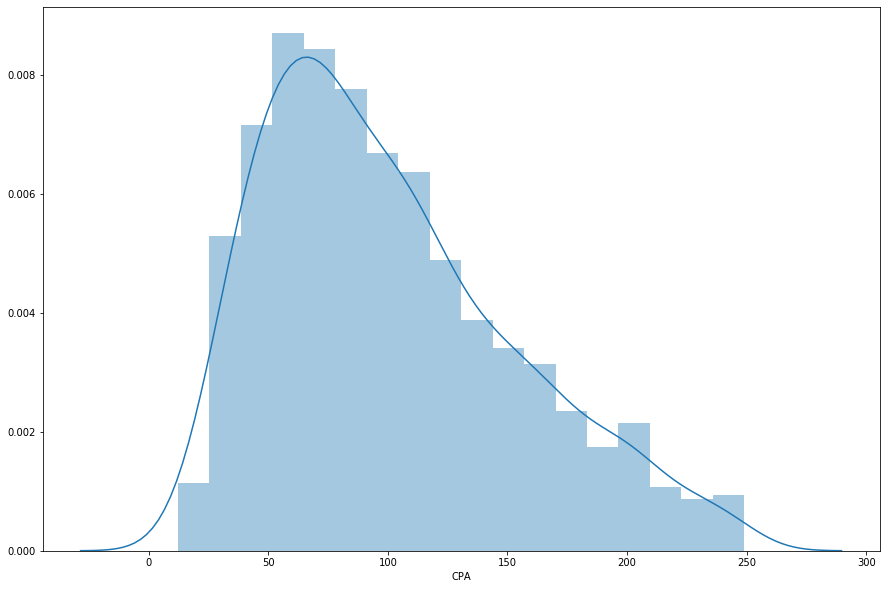

In [20]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['CPA'])

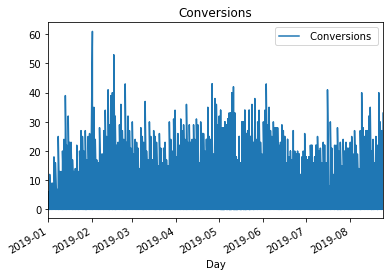

In [14]:
df.plot(y=' Conversions ',title='Conversions');

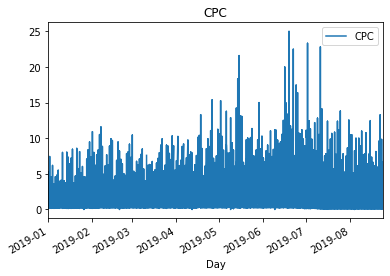

In [15]:
df.plot(y='CPC',title='CPC');

In [16]:
df3= pd.read_csv('Zeel_byday.csv',skiprows=2,index_col='Day',parse_dates=True)

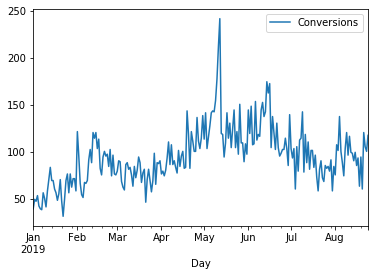

In [17]:
df3.plot(y='Conversions')

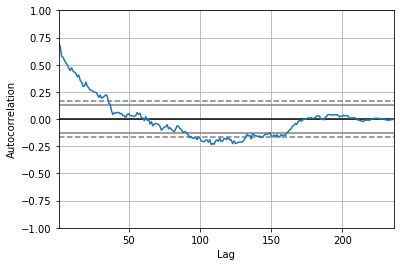

In [32]:
autocorrelation_plot(df3['Conversions'])

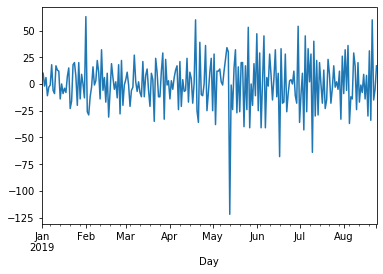

In [36]:
df3['Conversions'].diff().plot()

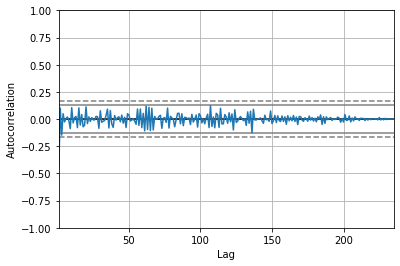

In [37]:
autocorrelation_plot(df3['Conversions'].diff()[1:])